Project Proposal: https://docs.google.com/document/d/1rRzJV0hOaNMsBIjji8v1Cv8C3QUuZ6lUvYokZ5dif-A/edit


In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
import warnings
from scipy import stats

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#import sys

credentials = []
f = open('credentials.txt', 'r')
for line in f:
    #add line to credentials list (remove trailing whitespace characters)
    credentials.append(line.rstrip())

# create Spotify object with credentials
client_credentials_manager = SpotifyClientCredentials(credentials[0], credentials[1])
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [2]:
df = pd.read_csv("/Users/gregwelliver/Desktop/springboard_files/Capstone Two - Music/Data/Merged_Data7.csv", index_col=[0])

In [3]:
df.isna().sum()

track_id                 0
track_name               0
track_genre              0
artist_name              0
track_popularity         0
popular_year             0
Top100                   0
key                      0
acousticness             0
danceability             0
duration_ms              0
energy                   0
instrumentalness         0
liveness                 0
loudness                 0
modality                 0
speechiness              0
tempo                    0
time_signature           0
valence                  0
second_artist       230971
artist_country       71786
collaboration            0
prevTop100               0
dtype: int64

## EDA

In [4]:
### QUESTION: when we have a categorical independent variable, is there much EDA that we can do with it?
### QUESTION: what do with variables we know are categorical, but python is reading as continuous (e.g. key, modality)

In [5]:
#df4.popular_year = int(df4.popular_year)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255096 entries, 0 to 255095
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          255096 non-null  object 
 1   track_name        255096 non-null  object 
 2   track_genre       255096 non-null  object 
 3   artist_name       255096 non-null  object 
 4   track_popularity  255096 non-null  float64
 5   popular_year      255096 non-null  int64  
 6   Top100            255096 non-null  object 
 7   key               255096 non-null  float64
 8   acousticness      255096 non-null  float64
 9   danceability      255096 non-null  float64
 10  duration_ms       255096 non-null  float64
 11  energy            255096 non-null  float64
 12  instrumentalness  255096 non-null  float64
 13  liveness          255096 non-null  float64
 14  loudness          255096 non-null  float64
 15  modality          255096 non-null  float64
 16  speechiness       25

In [7]:
df['popular_year'] = df['popular_year'].fillna(0)
df['popular_year'] = df['popular_year'].astype(int)

#### Selection of independent variable:

The goal of our model is to determine if a song will place on the Top 100 in a given year.  This is represented byt he Top100 variable. Let's explore the indepdent variable further.

In [8]:
# subset of tracks that made top 100
TopSongs = df[df['Top100'] == "Y"]

In [9]:
TopSongs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863 entries, 0 to 249637
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          1863 non-null   object 
 1   track_name        1863 non-null   object 
 2   track_genre       1863 non-null   object 
 3   artist_name       1863 non-null   object 
 4   track_popularity  1863 non-null   float64
 5   popular_year      1863 non-null   int64  
 6   Top100            1863 non-null   object 
 7   key               1863 non-null   float64
 8   acousticness      1863 non-null   float64
 9   danceability      1863 non-null   float64
 10  duration_ms       1863 non-null   float64
 11  energy            1863 non-null   float64
 12  instrumentalness  1863 non-null   float64
 13  liveness          1863 non-null   float64
 14  loudness          1863 non-null   float64
 15  modality          1863 non-null   float64
 16  speechiness       1863 non-null   float6

In [10]:
#print(TopSongs[['track_name', 'second_artist']])

In [11]:
Artists_Grouped = TopSongs.groupby('artist_name')
Artists_Grouped.head(10)

,track_id,track_name,track_genre,artist_name,track_popularity,popular_year,Top100,key,acousticness,danceability,...,loudness,modality,speechiness,tempo,time_signature,valence,second_artist,artist_country,collaboration,prevTop100
0,3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady,hip-hop,Eminem,88.0,2000,Y,5.0,0.03020,0.949,...,-4.244,0.0,0.0572,104.504,4.0,0.760,NaN,United States,N,N
1,0I3q5fE6wg7LIfHGngUTnV,Ms. Jackson,hip-hop,Outkast,82.0,2001,Y,4.0,0.14300,0.843,...,-5.946,0.0,0.2690,94.948,4.0,0.613,NaN,NaN,N,N
2,3UmaczJpikHgJFyBTAJVoz,Stan,hip-hop,Eminem,85.0,2001,Y,6.0,0.03710,0.780,...,-4.325,0.0,0.2380,80.063,4.0,0.507,NaN,United States,N,N
3,3Gf5nttwcX9aaSQXRWidEZ,Ride Wit Me,hip-hop,Nelly,75.0,2001,Y,7.0,0.06160,0.850,...,-6.490,1.0,0.0478,101.875,4.0,0.722,NaN,United States,N,N
6,3wMUvT6eIw2L5cZFG1yH9j,Country Grammar (Hot Shit),hip-hop,Nelly,69.0,2000,Y,2.0,0.00689,0.865,...,-6.822,1.0,0.1080,162.831,4.0,0.565,NaN,United States,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238323,10hcDov7xmcRviA8jLwEaI,Need to Know,pop,Doja Cat,67.0,2021,Y,1.0,0.30400,0.664,...,-6.509,1.0,0.0707,130.041,4.0,0.194,NaN,NaN,N,N
238687,4w47S36wQGBhGg073q3nt7,TKN (feat. Travis Scott),r&b,ROSALÍA,70.0,2020,Y,0.0,0.19200,0.776,...,-6.266,0.0,0.4670,94.634,4.0,0.485,Travis Scott,Spain,Y,N
249131,1raaNykBg1bDnWENUiglUA,Break My Heart,dance,Dua Lipa,67.0,2020,Y,4.0,0.16700,0.730,...,-3.434,0.0,0.0886,113.012,4.0,0.467,NaN,United Kingdom,N,N
249545,0BI0hfbmqybnd3TezrDME3,Met Him Last Night (feat. Ariana Grande),dance,Demi Lovato,60.0,2021,Y,4.0,0.22000,0.538,...,-4.548,0.0,0.0262,144.978,4.0,0.120,NaN,United States,Y,N


In [12]:
Artists_Grouped = TopSongs.groupby('artist_name').count().track_id.sort_values(ascending=False)
#Artists_Grouped = pd.DataFrame(TopSongs.groupby('artist_name').count().track_id.sort_values(ascending=False))
Artists_Grouped

artist_name
Drake                  26
Rihanna                25
Taylor Swift           25
Eminem                 22
Ariana Grande          20
                       ..
Dean Lewis              1
Death Cab for Cutie     1
Default                 1
Dem Franchize Boyz      1
Olivia Rodrigo          1
Name: track_id, Length: 754, dtype: int64

#### Let's look at more detail on which artist had the most Top 100 hits - Drake.

In [13]:
DrakeSongs = TopSongs[TopSongs['artist_name'] == "Drake"]
#DrakeSongs = DrakeSongs.groupby('popular_year').count().artist_name.sort_values(ascending=False)
#print(DrakeSongs)
DrakeSongs


,track_id,track_name,track_genre,artist_name,track_popularity,popular_year,Top100,key,acousticness,danceability,...,loudness,modality,speechiness,tempo,time_signature,valence,second_artist,artist_country,collaboration,prevTop100
92578,3QLjDkgLh9AOEHlhQtDuhs,Best I Ever Had,hip-hop,Drake,77.0,2009,Y,1.0,0.190000,0.395,...,-2.176,1.0,0.3750,162.361,4.0,0.5580,NaN,Canada,N,N
114652,4BycRneKmOs6MhYG9THsuX,Find Your Love,hip-hop,Drake,65.0,2010,Y,6.0,0.021100,0.627,...,-6.006,0.0,0.1700,96.038,4.0,0.7580,NaN,Canada,N,N
115629,6LxSe8YmdPxy095Ux6znaQ,Headlines,hip-hop,Drake,76.0,2011,Y,6.0,0.365000,0.636,...,-7.160,0.0,0.1060,151.894,4.0,0.4250,NaN,Canada,N,N
115631,4Kz4RdRCceaA9VgTqBhBfa,The Motto,hip-hop,Drake,74.0,2012,Y,1.0,0.000107,0.766,...,-8.558,1.0,0.3560,201.800,4.0,0.3900,NaN,Canada,N,N
115635,124NFj84ppZ5pAxTuVQYCQ,Take Care,hip-hop,Drake,75.0,2012,Y,0.0,0.026700,0.629,...,-10.358,0.0,0.2650,121.845,4.0,0.2990,NaN,Canada,N,N
120601,6BdgtqiV3oXNqBikezwdvC,Over,pop,Drake,68.0,2010,Y,7.0,0.010700,0.350,...,-5.614,1.0,0.2000,99.643,5.0,0.4500,NaN,Canada,N,N
139166,2aSC2xhRxOLiiZZVjhbylH,"Hold On, We're Going Home",hip-hop,Drake,72.0,2013,Y,6.0,0.004210,0.777,...,-7.440,0.0,0.0946,100.002,4.0,0.2870,NaN,Canada,N,N
139181,5DI9jxTHrEiFAhStG7VA8E,Started From the Bottom,hip-hop,Drake,66.0,2013,Y,8.0,0.031900,0.793,...,-7.827,1.0,0.1560,86.325,4.0,0.5790,NaN,Canada,N,N
162373,27GmP9AWRs744SzKcpJsTZ,Jumpman,hip-hop,Drake,71.0,2015,Y,1.0,0.055900,0.852,...,-7.286,1.0,0.1870,142.079,4.0,0.6560,Future,Canada,Y,N
184398,1zi7xx7UVEFkmKfv06H8x0,One Dance,hip-hop,Drake,85.0,2016,Y,1.0,0.007760,0.792,...,-5.609,1.0,0.0536,103.967,4.0,0.3700,NaN,Canada,N,N


In [14]:
#x = DrakeSongs['popular_year']
#y = DrakeSongs[]

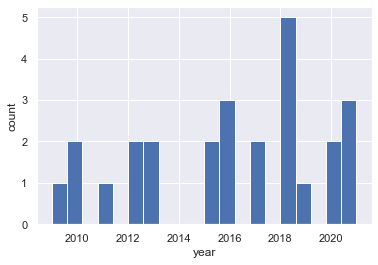

In [15]:
plt.hist(DrakeSongs.popular_year, bins=20)
plt.xlabel('year')
plt.ylabel('count');

2018 was an amazing year for Drake!

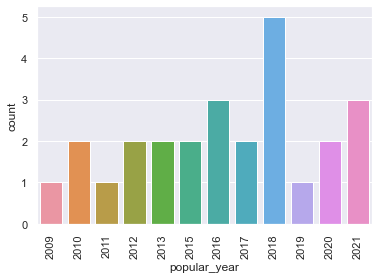

In [16]:
sns.countplot(x='popular_year', data=DrakeSongs)
plt.xticks(rotation=90);

In [17]:
#artist_count = TopSongs.groupby('artist_name').count().track_id.sort_values(ascending=False)
#plt.hist(artist_count)

In [20]:
with sns.axes_style('white'):
    g = sns.factorplot("popular_year", data=DrakeSongs, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

AttributeError: module 'seaborn' has no attribute 'factorplot'

#### Let's look at the most popular genres in the Top 100s

In [ ]:
Genres_Grouped = TopSongs.groupby('track_genre').count().track_id.sort_values(ascending=False)
Genres_Grouped

sns.set_theme(style="white")

sns.relplot(x=TopSongs["popular_year"], y=TopSongs["track_genre"], hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=TopSongs)

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
pop_stats = TopSongs.groupby('track_genre').count().track_id.sort_values(ascending=False)

sns.barplot(x=pop_stats.index, y=pop_stats)
;
# QUESTION: how plot this such that "count" shows up on the y-axis

In [ ]:
sns.countplot(x=Genres_Grouped.index, data=Genres_Grouped)
plt.xticks(rotation=90);

In [ ]:
TopSongs.head()

#### come back to this one
with sns.axes_style('white'):
    g = sns.factorplot("popular_year", data=TopSongs, aspect=4.0, kind='count',
                       hue='track_genre', order=range(2000, 2021))
    g.set_ylabels('Count')

In [ ]:
#sns.displot(TopSongs, x="popular_year", hue="track_genre");

#### Genres over time

In [ ]:
sns.displot(TopSongs, x="popular_year", hue="track_genre", multiple="stack", bins=22);

_Observations on genres over time:_

- Pop and hip-hop have always maintained a sizeable portion of the Top 100
- House music really began to hold a sizable position starting in 2010
- Rock music has faded in recent years

In [ ]:
#TopSongs.popular_year.value_counts()

In [ ]:
TopSongs.groupby('artist_name').count().track_id.sort_values(ascending=False)

In [ ]:
TopSongs.groupby(['artist_name', 'popular_year']).count().track_id.sort_values(ascending=False)

In [ ]:
TopSongs.groupby(['artist_name', 'popular_year']).count().track_id.sort_values(ascending=False)

In [ ]:
TopLabels = TopSongs.groupby(['Label']).count().track_id.sort_values(ascending=False)
TopLabels

In [ ]:
TopLabels.value_counts()

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
pop_stats = TopSongs.groupby('Label').count()['track_id'].sort_values(ascending=False)

sns.barplot(x=pop_stats.index, y=pop_stats)
;
# QUESTION: how plot this such that "count" shows up on the y-axis

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
pop_stats = TopSongs.groupby('Label').count().track_id.sort_values(ascending=False)

sns.barplot(x=pop_stats.index, y=pop_stats)
;
# QUESTION: how plot this such that "count" shows up on the y-axis

In [ ]:
TopLabels.plot()
plt.xticks(rotation=30)
plt.show()

In [ ]:
TopLabels.info()

In [ ]:
TopSongs.groupby(['artist_country']).count().track_id.sort_values(ascending=False)

In [ ]:
TopSongs[TopSongs['artist_country']=='Colombia']

In [ ]:
df.corr()

### Observations on correlation matrix: 
there does not appear to be much correlation between the availble variables.  The only variables with a coefficient higher than +_0.5 are:
 - Energy/Acousticness
 - Danceability/Valence
 - Loudness/Accousticness
 - Energy/Loudness
 - Acousticness/Loudness
 - Loudness/Instrumentalness
 
 It's worth noting that Loudness is included in four of these pairs (could be a candidate for removal)

In [ ]:
df.describe()

In [ ]:
#sns.pairplot(df4)

In [ ]:
#seaborn.histplot(data, x, y, hue, stat, bins, binwidth, discrete, kde, log_scale)

sns.histplot(df4.key)


sns.histplot(data=df4.key, x="sepal_length")
plt.show()

In [ ]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

In [ ]:
#boxplot_data = pd.DataFrame(df4.drop(columns='duration_ms',inplace=True))
#df4.liveness.boxplot(figsize=(15,8))
#plt.show()
#boxplot_data.head()

def
for column in df4:
    quality_normal = 

column_list = list(df4.columns)

[stats.normaltest(df4[(column)]) for column in column_list]

plt.hist(df4.key)
plt.xlabel('key')
plt.ylabel('count');

quality_normal = stats.normaltest(df4.key)
print(quality_normal)

In [ ]:
stats.normaltest(df['acousticness'])

In [ ]:
stats.normaltest(df.danceability)

In [ ]:
plt.hist(df.acousticness)
plt.xlabel('acousticness')
plt.ylabel('count');

quality_normal = stats.normaltest(df5.acousticness)
print(quality_normal)

For feature engineering, can derive:
- artist age from kaggle file that I found
- collaboration (based on second artist, or based on "featuring")
- if they previously appeared on a top 100 list
- look at major record labels and independents

#### write to CSV
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Capstone Two - Music/Data/Merged_Data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df3.to_csv(filepath)

df4 = df4.rename(columns = {'mode':'modality'})